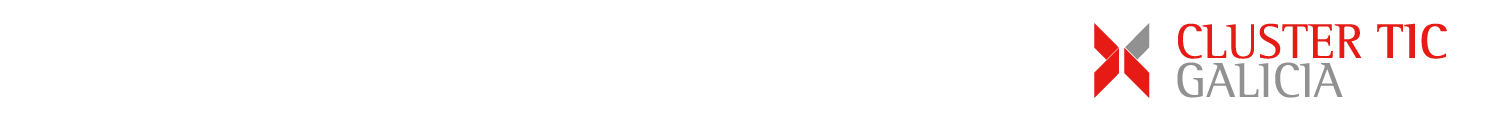
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Decoradores</div>

# La sucesión de Fibonacci

Planteémonos el siguiente objetivo: crear una función que nos devuelva el n-ésimo valor de la sucesión de Fibonacci. En esta sucesión, el primer valor es el 1, el segundo también es el 1 y, a partir de ahí, los valores se calculan como la suma de los dos anteriores. De esta forma, el tercer valor es el 2 (1 + 1), el cuarto es el 3 (1 + 2), etc.:

1, 1, 2, 3, 5, 8...

Podríamos implementar esta función fácilmente de forma tal que, si el valor solicitado es el primero o el segundo, se devuelva 1 directamente. Y si no lo es, se devuelva la suma de los dos valores previos, que pueden obtenerse invocando a la misma función de forma recursiva:

In [1]:
def fibonacci(n):
    if (n == 1) or (n == 2):
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

Probemos la función pidiéndole los primeros 10 valores de la sucesión y midamos el tiempo de ejecución:

In [2]:
%%time
for n in range(1, 11):
    print(n, fibonacci(n))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
CPU times: total: 0 ns
Wall time: 0 ns


Muy rápida. Ahora bien, pidámosle los primeros 35 valores, también midiendo el tiempo de ejecución: 

In [3]:
%%time
for n in range(1, 36):
    print(n, fibonacci(n))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
CPU times: total: 3.11 s
Wall time: 3.12 s


Comprobamos que el tiempo para obtener el n-ésimo valor se hace mayor y mayor a medida que n crece, lo que es lógico tal y como hemos escrito la función: para calcular el valor 30, por ejemplo, es necesario calcular los valores 29 y 28. Pero para obtener el valor 29, es necesario calcular los valores 28 y 27, etc.

Comprobemos solamente el tiempo que tarda en obtener los 35 valores, sin mostrarlos en pantalla:

In [4]:
%%time
for n in range(1, 36):
    fibonacci(n)

CPU times: total: 3.02 s
Wall time: 3.01 s


Podríamos solucionar esto "cacheando" (memorizando) los valores que vayamos obteniendo. Con este objetivo podríamos crear un diccionario que recibiese, como clave, el valor n y, como valor, su valor en la sucesión de Fibonacci. Ahora, nuestra función comprobaría en primer lugar si un valor ha sido ya calculado y, si es el caso, lo obtendría directamente del diccionario (si no se hubiese obtenido se calcularía):

In [5]:
cache = {}

In [6]:
def fibonacci(n):
    if (n == 1) or (n == 2):
        return 1
    else:
        if n in cache:
            return cache[n]
        else:
            valor = fibonacci(n - 1) + fibonacci(n - 2)
            cache[n] = valor
            return valor

Comprobemos el tiempo de ejecución tras esta mejora:

In [7]:
%%time
for n in range(1, 36):
    fibonacci(n)

CPU times: total: 0 ns
Wall time: 0 ns


Tras este cambio, el cálculo de los primeros 35 valores es instantáneo.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Decoradores

Los decoradores en Python son una potente herramienta que permite modificar el comportamiento de una función, método o clase. Se utilizan para "envolver" otra función o método, permitiéndonos ejecutar código antes y después de la función envuelta sin modificar su código fuente (o, como suele decirse, de esta forma "aumentamos" la función con el decorador). Esto es particularmente útil para agregar funcionalidades de manera limpia y reutilizable a nuestras funciones y métodos, como logging, control de acceso, medición de tiempo, "cacheado" de resultados, etc.

Un decorador en Python es usualmente definido como una función que recibe una función como argumento y devuelve otra función.

Aquí tenemos un ejemplo simple de cómo crear un decorador:

In [8]:
def decorator(func):
    def wrapper():
        print("Este código se ejecuta antes de llamar a la función")
        func()
        print("Este código se ejecuta después de llamar a la función")
    return wrapper

Una vez creado, podemos ejecutarlo pasándole cualquier función. Por ejemplo:

In [9]:
def saluda():
    print("¡Hola mundo!")

In [10]:
f = decorator(saluda)
f()

Este código se ejecuta antes de llamar a la función
¡Hola mundo!
Este código se ejecuta después de llamar a la función


Es decir, cuando ejecutamos la función *decorator* pasándole como argumento la función *saluda*, lo que obtenemos es otra función (la función *wrapper* que estamos almacenando en la variable *f*) que, en nuestro caso, -cuando se ejecute- ejecutará tres instrucciones:

1. Imprimirá el texto "*Este código se ejecuta antes de llamar a la función*"
2. Ejecutará la función *saluda*, y
3. Imprimirá el texto "*Este código se ejecuta después de llamar a la función*"

Eso sí, todo esto ocurrirá cuando ejecutemos la función. Para ello, una vez hemos obtenido la función *wrapper* y la hemos almacenado en *f*, podemos ejecutarla como ejecutamos cualquier función: haciendo referencia a su nombre seguido de paréntesis: f().

Habríamos obtenido el mismo resultado con:

In [11]:
decorator(saluda)()

Este código se ejecuta antes de llamar a la función
¡Hola mundo!
Este código se ejecuta después de llamar a la función


aunque, en este caso, queda un poco menos obvio el proceso seguido.

# Syntax sugar

Sin embargo, Python nos ofrece otro método mucho más cómodo para aplicar automáticamente un decorador a una función, y es añadir el código *@nombre-del-decorador* antes de la definición de la función:

In [12]:
@decorator
def saluda():
    print("¡Hola mundo!")

Ahora, cuando ejecutemos la función, se invocará automáticamente el decorador:

In [13]:
saluda()

Este código se ejecuta antes de llamar a la función
¡Hola mundo!
Este código se ejecuta después de llamar a la función


Este tipo de mejoras en la sintaxis de un lenguaje de programación que nos permiten ejecutar una herramienta más cómodamente es lo que se denomina **syntax sugar** (*azúcar sintáctico*).

# Decoradores con parámetros

Por supuesto, si la función que estamos aumentando con el decorador espera recibir argumentos, el código del decorador tendrá que tener esto en cuenta. Por ejemplo, supongamos que partimos de una sencilla función que suma dos números:

In [14]:
def suma(a, b):
    return a + b

Si quisiéramos crear un decorador que ejecutase cierto código antes y después de ejecutar la función, tendríamos que crearlo del siguiente modo:

In [15]:
def decorator(func):
    def wrapper(a, b):
        print("Este código se ejecuta antes de llamar a la función")
        result = func(a, b)
        print(result)
        print("Este código se ejecuta después de llamar a la función")
    return wrapper

Ahora, ya podríamos aumentar nuestra función:

In [16]:
@decorator
def suma(a, b):
    return a + b

In [17]:
suma(4, 6)

Este código se ejecuta antes de llamar a la función
10
Este código se ejecuta después de llamar a la función


En cualquier caso, resulta conveniente que, cuando creamos un decorador, lo hagamos intentando que sea aplicable al mayor número de funciones que sea posible. En el ejemplo que acabamos de ver, el decorador solo sería aplicable a funciones con dos argumentos, lo que no es muy generalizable. Es por ello por lo que, habitualmente, los decoradores se crean para que funcionen con cualquier número de argumentos, tanto posicionales como nominales, lo que puede conseguirse con el siguiente código:

In [18]:
def decorator(func):
    def wrapper(*args, **kwargs):
        print("Este código se ejecuta antes de llamar a la función")
        result = func(*args, **kwargs)
        print(result)
        print("Este código se ejecuta después de llamar a la función")
    return wrapper

Aquí, la función *wrapper* devuelta por el decorador acepta cualquier número de argumentos.

In [19]:
@decorator
def suma(a, b):
    return a + b

In [20]:
suma(4, 6)

Este código se ejecuta antes de llamar a la función
10
Este código se ejecuta después de llamar a la función


# Otros decoradorres

En todo caso, existen decoradores ya implementados en Python. Por ejemplo, *cache* o *lru_cache*. Veamos cómo podríamos aplicarlos a nuestro escenario basado en la sucesión de Fibonacci.

### cache

El decorador **cache** que podemos importar de la librería *functools* nos permite memorizar los valores devueltos por nuestra función:

In [21]:
from functools import cache

Apliquémosla a nuestra función *fibonacci* original:

In [22]:
@cache
def fibonacci(n):
    if (n == 1) or (n == 2):
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

Comprobemos el resultado:

In [23]:
%%time
for n in range(1, 36):
    fibonacci(n)

CPU times: total: 0 ns
Wall time: 0 ns


Vemos que, efectivamente, el cálculo es instantáneo. 

### lru_cache

El decorador **cache** memoriza todos los resultados devueltos por la función, lo que puede suponer un consumo de memoria excesivo. **lru_cache** (*Least Recently Used Cache*) que también podemos importar de la librería *functools* nos permite memorizar un número limitado de los valores devueltos por nuestra función.

In [24]:
from functools import lru_cache

Apliquémosla a nuestra función:

In [25]:
@lru_cache
def fibonacci(n):
    if (n == 1) or (n == 2):
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

Y comprobemos el resultado:

In [26]:
%%time
for n in range(1, 36):
    fibonacci(n)

CPU times: total: 0 ns
Wall time: 0 ns


Este decorador memoriza, por defecto, un máximo de 128 valores. Pero podemos modificar este número usando el parámetro *maxsize*:

In [27]:
@lru_cache(maxsize = 1000)
def fibonacci(n):
    if (n == 1) or (n == 2):
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>